In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
import scipy.stats as stats 
from scipy.stats import norm, skew, probplot
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.decomposition import PCA

In [2]:
# importing necessary dataframes from module
from Feat_eng import (Y_train, X_train, Y_test, X_test, 
    c1_train, c2_train, c3_train, c1_test, c2_test, c3_test, 
    Y_c1train, Y_c2train, Y_c3train, Y_c1test, Y_c2test ,Y_c3test, zil_yr, target)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().dro

In [3]:
pd.set_option('display.max_columns', None)
target.head(10)

,RegionName,year,value,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,City,cpi,gdp,interest,zip,est,log_value,future_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster
0,01104,2014,946.100000,01104,3346.0,5526.0,1949.0,158.0,1597.0,523.0,325.0,327.0,603.0,333.0,327.0,340.0,25.0,22285.0,36.1,522.0,8872.0,29184.0,18029.0,9541.0,669.0,210.0

In [4]:
# pulling zri values from target DF
zri_yr = target[['RegionName', 'year', 'value']].copy()
zri_yr

,RegionName,year,value
0,01104,2014,946.100000
1,01104,2015,972.583333
2,01104,2016,1058.666667
3,01104,2017,1129.166667
4,01104,2018,1125.083333
...,...,...,...
6067,98499,2014,979.000000
6068,98499,2015,995.833333
6069,98499,2016,1036.166667
6070,98499,2017,1154.833333


In [5]:
# importing ZORI DF from zillow
zori = pd.read_csv('../data/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')
zori

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
0,61639,10025,1,"New York, NY",2883.0,2898.0,2913.0,2928.0,2942.0,2957.0,2971.0,2986.0,3000.0,3014.0,3026.0,3039.0,3052.0,3061.0,3071.0,3081.0,3088.0,3096.0,3103.0,3109.0,3115.0,3121.0,3125.0,3129.0,3134.0,3136.0,3138.0,3140.0,3140.0,3140.0,3139.0,3137.0,3135.0,3133.0,3133.0,3133.0,3133.0,3134.0,3136.0,3137.0,3138.0,3138.0,3139.0,3140.0,3141.0,3142.0,3143.0,3143.0,3144.0,3145.0,3147.0,3149.0,3154.0,3159.0,3164.0,3171.0,3178.0,3185.0,3191.0,3198.0,3205.0,3212.0,3219.0,3226.0,3233.0,3239.0,3245.0,3249.0,3252.0,3256.0,3248.0,3239.0,3231.0,3203.0,3176.0,3148.0,3110.0,3072.0,3034.0,3000.0,2966.0,2932.0,2931.0,2929.0,2928.0,2931.0,2935.0,2938.0,2946.0,2953.0,2961.0,2972.0
1,84654,60657,2,"Chicago, IL",1364.0,1369.0,1374.0,1379.0,1384.0,1388.0,1393.0,1398.0,1402.0,1407.0,1411.0,1416.0,1420.0,1425.0,1429.0,1433.0,1437.0,1441.0,1445.0,1450.0,1454.0,1458.0,1463.0,1467.0,1472.0,1476.0,1479.0,1483.0,1487.0,1491.0,1494.0,1498.0,1502.0,1505.0,1508.0,1511.0,1514.0,1516.0,1518.0,1520.0,1522.0,1524.0,1526.0,1527.0,1529.0,1530.0,1531.0,1533.0,1534.0,1535.0,1535.0,1536.0,1536.0,1536.0,1536.0,1537.0,1538.0,1539.0,1541.0,1543.0,1545.0,1549.0,1552.0,1555.0,1560.0,1564.0,1568.0,1572.0,1575.0,1579.0,1579.0,1580.0,1580.0,1578.0,1575.0,1573.0,1569.0,1564.0,1560.0,1556.0,1552.0,1548.0,1548.0,1547.0,1546.0,1546.0,1546.0,1546.0,1546.0,1546.0,1546.0,1547.0
2,61637,10023,3,"New York, NY",3004.0,3014.0,3024.0,3033.0,3042.0,3051.0,3060.0,3069.0,3078.0,3086.0,3093.0,3100.0,3106.0,3112.0,3117.0,3123.0,3128.0,3134.0,3140.0,3145.0,3151.0,3156.0,3158.0,3159.0,3160.0,3157.0,3153.0,3150.0,3146.0,3142.0,3138.0,3136.0,3135.0,3133.0,3136.0,3139.0,3142.0,3147.0,3152.0,3157.0,3159.0,3161.0,3163.0,3164.0,3164.0,3165.0,3165.0,3165.0,3165.0,3166.0,3168.0,3169.0,3172.0,3175.0,3178.0,3181.0,3184.0,3187.0,3191.0,3195.0,3199.0,3204.0,3208.0,3213.0,3218.0,3223.0,3228.0,3233.0,3238.0,3244.0,3237.0,3230.0,3223.0,3199.0,3174.0,3150.0,3114.0,3078.0,3042.0,3008.0,2973.0,2938.0,2936.0,2933.0,2931.0,2933.0,2936.0,2938.0,2945.0,2951.0,2958.0,2968.0
3,91982,77494,4,"Houston, TX",1362.0,1359.0,1356.0,1353.0,1350.0,1348.0,1345.0,1342.0,1339.0,1337.0,1334.0,1332.0,1330.0,1329.0,1329.0,1328.0,1328.0,1327.0,1326.0,1324.0,1322.0,1320.0,1317.0,1313.0,1310.0,1305.0,1301.0,1296.0,1291.0,1286.0,1282.0,1279.0,1276.0,1273.0,1271.0,1270.0,1268.0,1268.0,1268.0,1269.0,1272.0,1275.0,1278.0,1281.0,1285.0,1289.0,1291.0,1294.0,1296.0,1298.0,1300.0,1302.0,1302.0,1303.0,1303.0,1304.0,1305.0,1305.0,1306.0,1308.0,1309.0,1311.0,1313.0,1314.0,1316.0,1319.0,1321.0,1322.0,1324.0,1326.0,1327.0,1328.0,1329.0,1330.0,1332.0,1333.0,1335.0,1336.0,1338.0,1341.0,1344.0,1348.0,1358.0,1369.0,1380.0,1391.0,1403.0,1415.0,1427.0,1440.0,1452.0,1465.0
4,84616,60614,5,"Chicago, IL",1669.0,1674.0,1679.0,1683.0,1688.0,1693.0,1697.0,1702.0,1706.0,1710.0,1715.0,1720.0,1725.0,1731.0,1737.0,1743.0,1750.0,1756.0,1763.0,1771.0,1779.0,1786.0,1793.0,1800.0,1807.0,1812.0,1817.0,1822.0,1825.0,1828.0,1832.0,1835.0,1838.0,1841.0,1843.0,1846.0,1848.0,1850.0,1852.0,1855.0,1858.0,1861.0,1865.0,1868.0,1872.0,1875.0,1878.0,1880.0,1883.0,1884.0,1886.0,1887.0,1889.0,1890.0,1892.0,1894.0,1897.0,1900.0,1903.0,1907.0,1910.0,1915.0,1920.0,1925.0,1931.0,1937.0,1943.0,1947.0,1951.0,1956.0,1957.0,1

In [6]:
# converting zip column (RegionName) to string and filling with 0s
zori['RegionName'] = zori['RegionName'].astype(str).str.zfill(5)

# flattening monthly rent indices
cols_replace = list(zori.columns)[4:]
cols_keep = list(zori.columns)[:4]
zori_new = zori.melt(id_vars=cols_keep, value_vars = cols_replace)

# converting month column to datetime object and pulling year
zori_new['variable']= pd.to_datetime(zori_new['variable'])
zori_new['year'] = zori_new['variable'].apply(lambda a: a.year)

# grouping by year column and calculating mean
zori_yr = zori_new.groupby(['RegionName', 'year']).mean().reset_index()

# dropping non used columns
zori_yr.drop(['SizeRank','RegionID'], inplace=True, axis=1)

In [7]:
# zori_tot - zori data from all years
zori_tot = zori_yr.copy()

In [8]:
print(type(zori_yr['RegionName'].iloc[0]))
print(type(zri_yr['RegionName'].iloc[0]))

<class 'str'>
<class 'str'>


In [9]:
print(type(zori_yr['year'].iloc[0]))
print(type(zri_yr['year'].iloc[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [10]:
# checking zri_yr
zri_yr.head(50)

,RegionName,year,value
0,01104,2014,946.100000
1,01104,2015,972.583333
2,01104,2016,1058.666667
3,01104,2017,1129.166667
4,01104,2018,1125.083333
5,01108,2011,1127.545455
6,01108,2012,1025.909091
7,01108,2013,1033.583333
8,01108,2014,1005.909091
9,01108,2015,1011.250000


In [11]:
# checking zori_yr
zori_yr.head(50)

,RegionName,year,value
0,01604,2014,1087.000000
1,01604,2015,1153.583333
2,01604,2016,1220.666667
3,01604,2017,1284.250000
4,01604,2018,1359.416667
5,01604,2019,1442.583333
6,01604,2020,1522.250000
7,01604,2021,1641.125000
8,01702,2014,1519.285714
9,01702,2015,1552.375000


In [12]:
# left merge of zori values onto zri indices used in our DF
df_comb3 = zri_yr.merge(zori_yr, how='left',
              left_on = ['RegionName', 'year'], 
              right_on = ['RegionName', 'year'])
df_comb3.columns = ['RegionName', 'year', 'zri', 'zori']
df_comb3

,RegionName,year,zri,zori
0,01104,2014,946.100000,NaN
1,01104,2015,972.583333,NaN
2,01104,2016,1058.666667,NaN
3,01104,2017,1129.166667,NaN
4,01104,2018,1125.083333,NaN
...,...,...,...,...
6042,98499,2014,979.000000,NaN
6043,98499,2015,995.833333,NaN
6044,98499,2016,1036.166667,NaN
6045,98499,2017,1154.833333,NaN


In [13]:
df_comb3.isnull().sum()

RegionName       0
year             0
zri              0
zori          3343
dtype: int64

### Predicting ZRI with ZORI

In [14]:
# dropping zip codes / years with no zori values - ~6,000 to 2,700 observations
df_comb3_red = df_comb3.dropna()
df_comb3_red

,RegionName,year,zri,zori
40,01604,2014,1117.333333,1087.000000
41,01604,2015,1136.333333,1153.583333
42,01604,2016,1197.333333,1220.666667
43,01604,2017,1241.750000,1284.250000
44,01604,2018,1311.833333,1359.416667
...,...,...,...,...
6037,98498,2014,1012.272727,912.250000
6038,98498,2015,1101.750000,965.333333
6039,98498,2016,1200.583333,1029.500000
6040,98498,2017,1297.833333,1135.000000


Text(0, 0.5, 'ZORI')

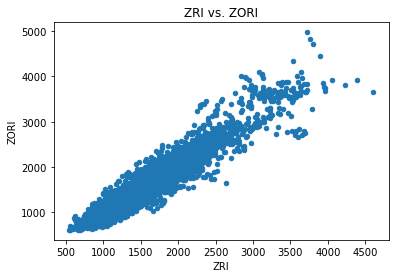

In [15]:
# plotting ZRI vs. ZORI
df_comb3_red.plot(kind='scatter', x='zori', y='zri')
plt.title('ZRI vs. ZORI')
plt.xlabel('ZRI')
plt.ylabel('ZORI')

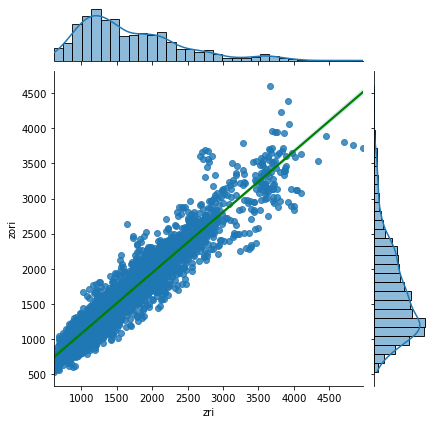

In [16]:
# same plot as above but in seaborn w/ reg. line
# non-normal distributions for both --> log transformations
ind_plot = sns.jointplot(x="zri", y="zori", data=df_comb3_red, kind='reg')
regline = ind_plot.ax_joint.get_lines()[0]
regline.set_color('green')

<AxesSubplot:>

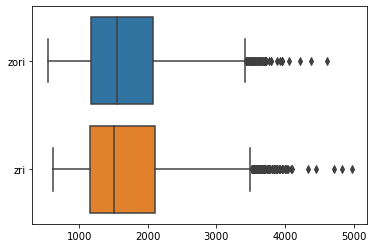

In [17]:
# checking box of ZORI & ZRI values
sns.boxplot(data = df_comb3_red[['zori', 'zri']], orient = 'h')

In [18]:
df_comb3_red.columns

Index(['RegionName', 'year', 'zri', 'zori'], dtype='object')

### Log Transformation of ZRI / ZORI

In [19]:
# log transformation of both ZRI and ZORI values
df_comb3_red['log_zri'] = np.log(df_comb3_red['zri'])
df_comb3_red['log_zori'] = np.log(df_comb3_red['zori'])

<ipython-input-19-93c9b8e66f70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb3_red['log_zri'] = np.log(df_comb3_red['zri'])
<ipython-input-19-93c9b8e66f70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb3_red['log_zori'] = np.log(df_comb3_red['zori'])


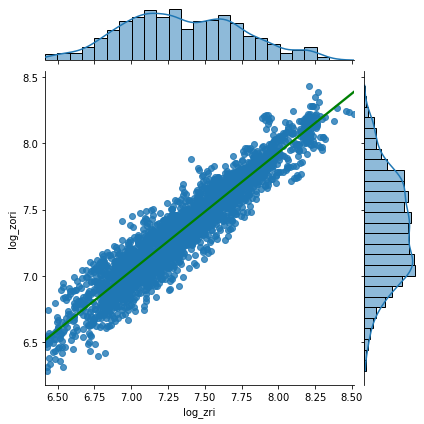

In [20]:
# scatter / hist of log-transformed ZRI and ZORI values
ind_plot = sns.jointplot(x="log_zri", y="log_zori", data=df_comb3_red, kind='reg')
regline = ind_plot.ax_joint.get_lines()[0]
regline.set_color('green')

### Regression w/ train-test split

In [21]:
# standardizing year values (simple subtraction of 2013 to keep values between 1 and 10)
df_comb3_red['year'] = df_comb3_red['year'] - 2013
df_comb3_red.head()

<ipython-input-21-fdb3ffeb9c4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb3_red['year'] = df_comb3_red['year'] - 2013


,RegionName,year,zri,zori,log_zri,log_zori
40,01604,1,1117.333333,1087.000000,7.018700,6.991177
41,01604,2,1136.333333,1153.583333,7.035562,7.050628
42,01604,3,1197.333333,1220.666667,7.087852,7.107152
43,01604,4,1241.750000,1284.250000,7.124277,7.157930
44,01604,5,1311.833333,1359.416667,7.179181,7.214811


In [22]:
# splitting train and test data (log ZRI/ZORI)
x_train, x_test, y_train, y_test = train_test_split(df_comb3_red[['log_zori', 'year']], 
                                                    df_comb3_red[['log_zri']], 
                                                    test_size = 0.2)


In [23]:
# linear regression - log zori & year to predict zri
lm = LinearRegression()
lm.fit(x_train, y_train)
print(f'R-squared: {lm.score(x_train, y_train)}')
print(f'Coefficient: {lm.coef_}')
print(f'Intercept: {lm.intercept_}')

R-squared: 0.8978303466027939
Coefficient: [[ 1.00886321 -0.00177703]]
Intercept: [-0.0611139]


In [24]:
# RMSE of transformed target train and predicted train
# high RMSE value --> ineffective model
pred = lm.predict(x_train)
mse = mean_squared_error(np.exp(y_train), np.exp(pred))
RMSE = np.sqrt(mse)
RMSE

230.29908795031346

In [25]:
# RMSE of test data - equally as inaccurate
pred = lm.predict(x_test)
mse = mean_squared_error(np.exp(y_test), np.exp(pred))
RMSE = np.sqrt(mse)
RMSE

243.21825596779652

### Custom Logic to Estimate ZRI Values

In [26]:
# creating table grouped by year to find mean zri / zori values
test = df_comb3_red.copy()
test = test.groupby('year').mean(['zri', 'zori'])

In [27]:
# calculating yearly percent change of zori and zri values
test['zori_change'] = test['zori'].pct_change()
test['zri_change'] = test['zri'].pct_change()
test.head(50)

,zri,zori,log_zri,log_zori,zori_change,zri_change
year,,,,,,
1,1564.980709,1548.834392,7.269773,7.269846,NaN,NaN
2,1656.074589,1625.280861,7.323966,7.318036,0.049357,0.058208
3,1721.069978,1684.647002,7.367913,7.357725,0.036527,0.039247
4,1750.300592,1732.424957,7.387858,7.387802,0.028361,0.016984
5,1767.511396,1783.935891,7.402887,7.420030,0.029733,0.009833


In [28]:
# table to include table of annual zori percent change
test3 = df_comb3_red.copy()
test3

,RegionName,year,zri,zori,log_zri,log_zori
40,01604,1,1117.333333,1087.000000,7.018700,6.991177
41,01604,2,1136.333333,1153.583333,7.035562,7.050628
42,01604,3,1197.333333,1220.666667,7.087852,7.107152
43,01604,4,1241.750000,1284.250000,7.124277,7.157930
44,01604,5,1311.833333,1359.416667,7.179181,7.214811
...,...,...,...,...,...,...
6037,98498,1,1012.272727,912.250000,6.919953,6.815914
6038,98498,2,1101.750000,965.333333,7.004655,6.872473
6039,98498,3,1200.583333,1029.500000,7.090563,6.936829
6040,98498,4,1297.833333,1135.000000,7.168451,7.034388


In [29]:
# creating predicted ZORI column
test3[['zri_pred']] = 0
test3

,RegionName,year,zri,zori,log_zri,log_zori,zri_pred
40,01604,1,1117.333333,1087.000000,7.018700,6.991177,0
41,01604,2,1136.333333,1153.583333,7.035562,7.050628,0
42,01604,3,1197.333333,1220.666667,7.087852,7.107152,0
43,01604,4,1241.750000,1284.250000,7.124277,7.157930,0
44,01604,5,1311.833333,1359.416667,7.179181,7.214811,0
...,...,...,...,...,...,...,...
6037,98498,1,1012.272727,912.250000,6.919953,6.815914,0
6038,98498,2,1101.750000,965.333333,7.004655,6.872473,0
6039,98498,3,1200.583333,1029.500000,7.090563,6.936829,0
6040,98498,4,1297.833333,1135.000000,7.168451,7.034388,0


In [30]:
# using annual ZORI rates to project yearly ZRI indices
test3['zri_pred'][test3['year']==1] = (test3['zri']*0.049357)+test3['zri']
test3['zri_pred'][test3['year']==2] = (test3['zri']*0.036527)+test3['zri']
test3['zri_pred'][test3['year']==3] = (test3['zri']*0.028361)+test3['zri']
test3['zri_pred'][test3['year']==4] = (test3['zri']*0.029733)+test3['zri']
test3['zri_pred'][test3['year']==5] = np.nan

<ipython-input-30-4eb456ff27fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3['zri_pred'][test3['year']==1] = (test3['zri']*0.049357)+test3['zri']


In [31]:
test3 = test3[test3['year']<5]
test3

,RegionName,year,zri,zori,log_zri,log_zori,zri_pred
40,01604,1,1117.333333,1087.000000,7.018700,6.991177,1172.481555
41,01604,2,1136.333333,1153.583333,7.035562,7.050628,1177.840181
42,01604,3,1197.333333,1220.666667,7.087852,7.107152,1231.290904
43,01604,4,1241.750000,1284.250000,7.124277,7.157930,1278.670953
85,01852,1,1683.454545,1205.375000,7.428603,7.094546,1766.544811
...,...,...,...,...,...,...,...
6027,98201,4,1342.333333,1203.500000,7.202165,7.092989,1382.244930
6037,98498,1,1012.272727,912.250000,6.919953,6.815914,1062.235472
6038,98498,2,1101.750000,965.333333,7.004655,6.872473,1141.993622
6039,98498,3,1200.583333,1029.500000,7.090563,6.936829,1234.633077


In [32]:
df_comb5 = df_comb3_red.copy()
df_comb5['year'] = df_comb5['year']-1
df_comb5

,RegionName,year,zri,zori,log_zri,log_zori
40,01604,0,1117.333333,1087.000000,7.018700,6.991177
41,01604,1,1136.333333,1153.583333,7.035562,7.050628
42,01604,2,1197.333333,1220.666667,7.087852,7.107152
43,01604,3,1241.750000,1284.250000,7.124277,7.157930
44,01604,4,1311.833333,1359.416667,7.179181,7.214811
...,...,...,...,...,...,...
6037,98498,0,1012.272727,912.250000,6.919953,6.815914
6038,98498,1,1101.750000,965.333333,7.004655,6.872473
6039,98498,2,1200.583333,1029.500000,7.090563,6.936829
6040,98498,3,1297.833333,1135.000000,7.168451,7.034388


In [33]:
# merging ZRI predictions with corresponding ZRI values (correct year)
# renaming columns
test2 = test3.merge(df_comb5[['RegionName', 'zri', 'year']], how = 'left', left_on = ['RegionName', 'year'], right_on = ['RegionName','year'])
test2.columns = [['RegionName', 'year', 'zri', 'zori', 'log_zri', 'log_zori', 'zri_pred', 'zri_future']]
test2

,RegionName,year,zri,zori,log_zri,log_zori,zri_pred,zri_future
0,01604,1,1117.333333,1087.000000,7.018700,6.991177,1172.481555,1136.333333
1,01604,2,1136.333333,1153.583333,7.035562,7.050628,1177.840181,1197.333333
2,01604,3,1197.333333,1220.666667,7.087852,7.107152,1231.290904,1241.750000
3,01604,4,1241.750000,1284.250000,7.124277,7.157930,1278.670953,1311.833333
4,01852,1,1683.454545,1205.375000,7.428603,7.094546,1766.544811,1796.083333
...,...,...,...,...,...,...,...,...
2125,98201,4,1342.333333,1203.500000,7.202165,7.092989,1382.244930,1405.583333
2126,98498,1,1012.272727,912.250000,6.919953,6.815914,1062.235472,1101.750000
2127,98498,2,1101.750000,965.333333,7.004655,6.872473,1141.993622,1200.583333
2128,98498,3,1200.583333,1029.500000,7.090563,6.936829,1234.633077,1297.833333


In [34]:
# checking null
test2.isnull().sum()

RegionName    0
year          0
zri           0
zori          0
log_zri       0
log_zori      0
zri_pred      0
zri_future    6
dtype: int64

In [35]:
# dropping 6 rows w/ null values in zri_future
test2.dropna(inplace=True)

In [36]:
# RMSE between predicted zri_values and actual
# better than linear model above
pred = test2['zri_pred']
mse = mean_squared_error(test2['zri_future'], pred)
RMSE = np.sqrt(mse)
RMSE

83.82389048969452

<AxesSubplot:xlabel='zri_pred', ylabel='zri_future'>

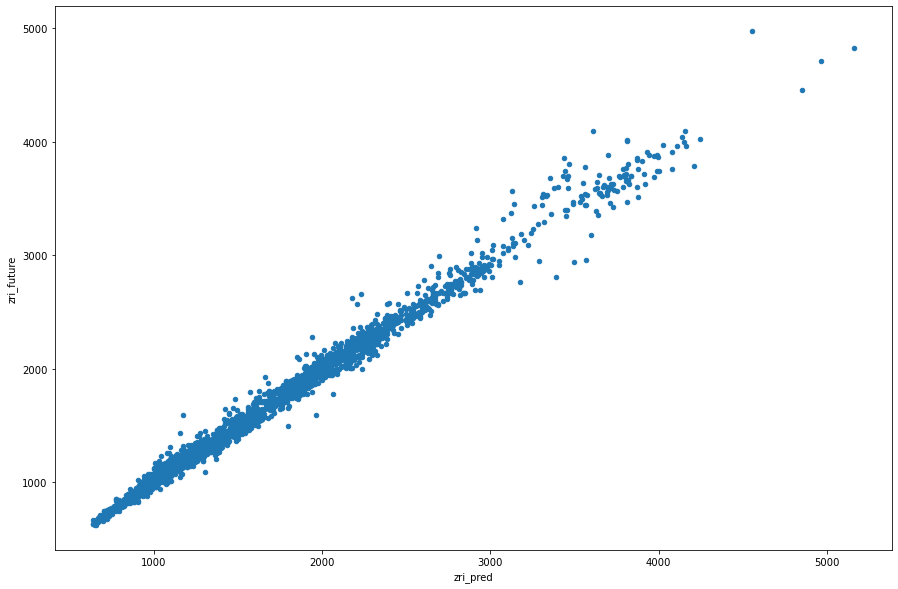

In [37]:
# scatter of zri_pred and zri_future - much more condense than linear model
test2.plot(kind='scatter', x='zri_pred', y='zri_future', figsize = (15,10))


### Calculate the ZORI change for years outside the range of ZRI
#### Applying same model to ZRI scores 2018 and onward

In [38]:
zori_tot.columns

Index(['RegionName', 'year', 'value'], dtype='object')

In [39]:
# grabbing unique zip codes from master DF - target
zips_unique_that_are_also_in_target = list(target['RegionName'].unique())
len(zips_unique_that_are_also_in_target)

941

In [40]:
zori_new = zori_tot[zori_tot['RegionName'].isin(zips_unique_that_are_also_in_target)]
zori_new

,RegionName,year,value
0,01604,2014,1087.000000
1,01604,2015,1153.583333
2,01604,2016,1220.666667
3,01604,2017,1284.250000
4,01604,2018,1359.416667
...,...,...,...
17315,98498,2017,1135.000000
17316,98498,2018,1216.750000
17317,98498,2019,1282.250000
17318,98498,2020,1362.166667


In [41]:
# mean zori values by year
zori_new = zori_new.groupby('year').mean('value').reset_index()
zori_new

,year,value
0,2014,1537.855626
1,2015,1624.231014
2,2016,1689.509710
3,2017,1736.263431
4,2018,1785.924067
5,2019,1842.976961
6,2020,1849.981145
7,2021,1896.009954


In [42]:
# percent change of zori values on an annual basis
zori_new['zori_change'] = zori_new['value'].pct_change()
zori_new

,year,value,zori_change
0,2014,1537.855626,NaN
1,2015,1624.231014,0.056166
2,2016,1689.509710,0.040191
3,2017,1736.263431,0.027673
4,2018,1785.924067,0.028602
5,2019,1842.976961,0.031946
6,2020,1849.981145,0.003800
7,2021,1896.009954,0.024881


In [43]:
# initializing DF with ZRI predictions in 2019, 2020, and 2021
testing = pd.DataFrame(np.repeat(zips_unique_that_are_also_in_target,3,axis=0))
testing.columns = ['RegionName']
testing

,RegionName
0,01104
1,01104
2,01104
3,01108
4,01108
...,...
2818,98498
2819,98498
2820,98499
2821,98499


In [44]:
# filling year values per zip code--> 2019 - 2021
from itertools import cycle

seq = cycle([2019, 2020, 2021])
testing['year'] = [next(seq) for count in range(testing.shape[0])]
testing

,RegionName,year
0,01104,2019
1,01104,2020
2,01104,2021
3,01108,2019
4,01108,2020
...,...,...
2818,98498,2020
2819,98498,2021
2820,98499,2019
2821,98499,2020


In [45]:
# filtering ZRI values for 2019 based off 2018 future values
zri_2019 = target[target['year']==2018][['RegionName', 'future_value']]
zri_2019['year'] = 2019
zri_2019

,RegionName,future_value,year
4,01104,1145.583333,2019
12,01108,1201.500000,2019
20,01109,1196.727273,2019
28,01602,1401.333333,2019
36,01603,1325.583333,2019
...,...,...,...
6048,98125,1645.200000,2019
6053,98201,1450.916667,2019
6061,98203,1510.916667,2019
6066,98498,1409.000000,2019


In [46]:
# merging 2019 ZRI values to testing
testing = testing.merge(zri_2019, how='left', on=['RegionName', 'year'])

In [47]:
testing.columns = ['RegionName', 'year', 'zri']
testing

,RegionName,year,zri
0,01104,2019,1145.583333
1,01104,2020,NaN
2,01104,2021,NaN
3,01108,2019,1201.500000
4,01108,2020,NaN
...,...,...,...
2818,98498,2020,NaN
2819,98498,2021,NaN
2820,98499,2019,1305.181818
2821,98499,2020,NaN


In [48]:
# calculating 2020 ZRI values using 2019-2020 ZORI percent change
zri_2020 = zri_2019[['RegionName']]
zri_2020['zri'] = (zri_2019[['future_value']]*0.003800)+zri_2019[['future_value']]
zri_2020['year'] = 2020
zri_2020

<ipython-input-48-c83debafa374>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zri_2020['zri'] = (zri_2019[['future_value']]*0.003800)+zri_2019[['future_value']]


,RegionName,zri,year
4,01104,1149.936550,2020
12,01108,1206.065700,2020
20,01109,1201.274836,2020
28,01602,1406.658400,2020
36,01603,1330.620550,2020
...,...,...,...
6048,98125,1651.451760,2020
6053,98201,1456.430150,2020
6061,98203,1516.658150,2020
6066,98498,1414.354200,2020


In [49]:
# merging 2020 ZRI predictions to testing (ZRI predictions) DF
testing = testing.merge(zri_2020, how='left', on=['RegionName', 'year'])
testing

,RegionName,year,zri_x,zri_y
0,01104,2019,1145.583333,NaN
1,01104,2020,NaN,1149.936550
2,01104,2021,NaN,NaN
3,01108,2019,1201.500000,NaN
4,01108,2020,NaN,1206.065700
...,...,...,...,...
2818,98498,2020,NaN,1414.354200
2819,98498,2021,NaN,NaN
2820,98499,2019,1305.181818,NaN
2821,98499,2020,NaN,1310.141509


In [50]:
# calculating 2021 ZRI values using 2020-2021 ZORI percent change
zri_2021 = zri_2020[['RegionName']]
zri_2021['zri'] = (zri_2020[['zri']]*0.024881)+zri_2020[['zri']]
zri_2021['year'] = 2021
zri_2021

<ipython-input-50-25dc102979c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zri_2021['zri'] = (zri_2020[['zri']]*0.024881)+zri_2020[['zri']]


,RegionName,zri,year
4,01104,1178.548121,2021
12,01108,1236.073821,2021
20,01109,1231.163756,2021
28,01602,1441.657468,2021
36,01603,1363.727720,2021
...,...,...,...
6048,98125,1692.541531,2021
6053,98201,1492.667589,2021
6061,98203,1554.394121,2021
6066,98498,1449.544747,2021


In [51]:
# merging 2021 ZRI predictions to testing (ZRI predictions) DF
testing = testing.merge(zri_2021, how='left', on=['RegionName', 'year'])
testing

,RegionName,year,zri_x,zri_y,zri
0,01104,2019,1145.583333,NaN,NaN
1,01104,2020,NaN,1149.936550,NaN
2,01104,2021,NaN,NaN,1178.548121
3,01108,2019,1201.500000,NaN,NaN
4,01108,2020,NaN,1206.065700,NaN
...,...,...,...,...,...
2818,98498,2020,NaN,1414.354200,NaN
2819,98498,2021,NaN,NaN,1449.544747
2820,98499,2019,1305.181818,NaN,NaN
2821,98499,2020,NaN,1310.141509,NaN


In [52]:
# setting null values to 0 and adding ZRI predictions across the rows
# dropping incomplete ZRI columns after summing
testing = testing.fillna(value=0)
testing['ZRI'] = testing['zri_x']+testing['zri_y']+testing['zri']
testing.drop(['zri_x', 'zri_y', 'zri'], axis=1, inplace=True)
testing

,RegionName,year,ZRI
0,01104,2019,1145.583333
1,01104,2020,1149.936550
2,01104,2021,1178.548121
3,01108,2019,1201.500000
4,01108,2020,1206.065700
...,...,...,...
2818,98498,2020,1414.354200
2819,98498,2021,1449.544747
2820,98499,2019,1305.181818
2821,98499,2020,1310.141509


In [53]:
# renaming final 2019 - 2021 predictions DF to future_target
future_target = testing.copy()
future_target

,RegionName,year,ZRI
0,01104,2019,1145.583333
1,01104,2020,1149.936550
2,01104,2021,1178.548121
3,01108,2019,1201.500000
4,01108,2020,1206.065700
...,...,...,...
2818,98498,2020,1414.354200
2819,98498,2021,1449.544747
2820,98499,2019,1305.181818
2821,98499,2020,1310.141509


### Create a New Dataframe for all Features with Data Created from Existing Years

In [54]:
# creating working copy of target
new_target = target.copy()
new_target.shape

(6047, 158)

In [55]:
# dropping columns not needed
new_target.drop(['geo_id', 'City', 'zip', 'future_value', 'value'], axis=1, inplace=True)
new_target.shape

(6047, 153)

In [56]:
# checking to ensure columns of new_target and training set matches (besides RegionName)
main_list = list(set(new_target.columns) - set(X_train.columns))
main_list

['RegionName']

In [57]:
# inititializing DF from projected 2019, 2020, and 2021 (& 2018) feature values
features = pd.DataFrame(np.repeat(zips_unique_that_are_also_in_target,4,axis=0))
features.columns = ['RegionName']
features

,RegionName
0,01104
1,01104
2,01104
3,01104
4,01108
...,...
3759,98498
3760,98499
3761,98499
3762,98499


In [58]:
# adding column for year values between 2018 - 2021
seq = cycle([2018, 2019, 2020, 2021])
features['year'] = [next(seq) for count in range(features.shape[0])]
features

,RegionName,year
0,01104,2018
1,01104,2019
2,01104,2020
3,01104,2021
4,01108,2018
...,...,...
3759,98498,2021
3760,98499,2018
3761,98499,2019
3762,98499,2020


In [59]:
# creating subset of column names to index on
columns = []
columns += ['RegionName']
columns.extend(list(X_train.columns))

# pulling 2018 values from master DF - target
feat_2018 = target[target['year']==2018][columns]
feat_2018['year'] = 2018
feat_2018

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster
4,01104,2018,3478.0,5599.0,1946.0,75.0,1963.0,502.0,202.0,496.0,490.0,393.0,306.0,421.0,68.0,23876.0,35.3,544.0,9077.0,31113.0,20132.0,9664.0,587.0,195.0,96.0,643.0,40.9,4161.0,0.0,2933.0,2043.0,814.0,274.0

In [60]:
# merging 2018 feature values as base to calculate 2019, 2020, and 2021 features
features = features.merge(feat_2018, on=['RegionName', 'year'], how='left')
features

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster
0,01104,2018,3478.0,5599.0,1946.0,75.0,1963.0,502.0,202.0,496.0,490.0,393.0,306.0,421.0,68.0,23876.0,35.3,544.0,9077.0,31113.0,20132.0,9664.0,587.0,195.0,96.0,643.0,40.9,4161.0,0.0,2933.0,2043.0,814.0,274.0

In [61]:
# DF to be used to calculate yearly percent change rates for each feature
new_target

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster
0,01104,2014,3346.0,5526.0,1949.0,158.0,1597.0,523.0,325.0,327.0,603.0,333.0,327.0,340.0,25.0,22285.0,36.1,522.0,8872.0,29184.0,18029.0,9541.0,669.0,210.0,69.0,631.0,38.8,4314.0,0.0,3028.0,1874.0,639.0,448.

In [62]:
# manipulating column names to reflect percent change values
new_columns = [x+'_diff' for x in columns]
new_columns

['RegionName_diff',
 'year_diff',
 'nonfamily_households_diff',
 'family_households_diff',
 'median_year_structure_built_diff',
 'rent_burden_not_computed_diff',
 'rent_over_50_percent_diff',
 'rent_40_to_50_percent_diff',
 'rent_35_to_40_percent_diff',
 'rent_30_to_35_percent_diff',
 'rent_25_to_30_percent_diff',
 'rent_20_to_25_percent_diff',
 'rent_15_to_20_percent_diff',
 'rent_10_to_15_percent_diff',
 'rent_under_10_percent_diff',
 'total_pop_diff',
 'median_age_diff',
 'commuters_by_public_transportation_diff',
 'households_diff',
 'median_income_diff',
 'income_per_capita_diff',
 'housing_units_diff',
 'vacant_housing_units_diff',
 'vacant_housing_units_for_rent_diff',
 'vacant_housing_units_for_sale_diff',
 'median_rent_diff',
 'percent_income_spent_on_rent_diff',
 'owner_occupied_housing_units_diff',
 'million_dollar_housing_units_diff',
 'mortgaged_housing_units_diff',
 'families_with_young_children_diff',
 'two_parent_families_with_young_children_diff',
 'two_parents_in_labo

In [63]:
# removing RegionName and year to strictly calc. percent changes for numerical variables
columns.remove('RegionName')
columns.remove('year')

In [64]:
# grouping by RegionName to calculate yearly percent change across all of the zip codes
diff = new_target.groupby('RegionName')
diff.head()

# percent change for each year-dependent feature
test5 = diff[columns].pct_change()

In [65]:
# remerging zip and year to be used when finding average percent change across each feature
test5 = pd.concat([test5, new_target[['RegionName', 'year']]], axis=1)
test5

,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster,RegionName,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [66]:
# percent change per zip code per year
test5 = test5.groupby('RegionName').mean()
test5

,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster,year
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01104,0.010352,0.003679,-3.847469e-04,-0.143710,0.0544

In [67]:
# resetting DF index 
test5 = test5.reset_index()
test5

,RegionName,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster,year
0,01104,0.010352,0.003679,-3.847469e-04,-0.143710,0.054466,-0.003364,-0.101065,0.113032,-0.050358,0.053999,-0.006528,0.060018,0.461697,0.017671,-0.005085,0.029425,0.005770,0.016496,0.028110,0.003252,-0.0277

In [68]:
# resetting columns list to include all variables (zip included)
columns = []
columns += ['RegionName']
columns.extend(list(X_train.columns))
columns

['RegionName',
 'year',
 'nonfamily_households',
 'family_households',
 'median_year_structure_built',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_40_to_50_percent',
 'rent_35_to_40_percent',
 'rent_30_to_35_percent',
 'rent_25_to_30_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'rent_under_10_percent',
 'total_pop',
 'median_age',
 'commuters_by_public_transportation',
 'households',
 'median_income',
 'income_per_capita',
 'housing_units',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'vacant_housing_units_for_sale',
 'median_rent',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units',
 'million_dollar_housing_units',
 'mortgaged_housing_units',
 'families_with_young_children',
 'two_parent_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_youn

In [69]:
# validating DF shapes
print(features[features['year']==2018].shape)
print(test5.shape)
features_2018 = features[features['year']==2018]
features_2018.shape

(941, 153)
(941, 153)


(941, 153)

In [70]:
# column indices to be iterated through when calculating predicted feature values
column1 = X_train.columns
column1 = column1.tolist()
column1.remove('year')
column1

['nonfamily_households',
 'family_households',
 'median_year_structure_built',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_40_to_50_percent',
 'rent_35_to_40_percent',
 'rent_30_to_35_percent',
 'rent_25_to_30_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'rent_under_10_percent',
 'total_pop',
 'median_age',
 'commuters_by_public_transportation',
 'households',
 'median_income',
 'income_per_capita',
 'housing_units',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'vacant_housing_units_for_sale',
 'median_rent',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units',
 'million_dollar_housing_units',
 'mortgaged_housing_units',
 'families_with_young_children',
 'two_parent_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_paren

In [71]:
# adjusting indices to be continuous from 1 - 940
features_2018 = features_2018.reset_index()
features_2018

,index,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster
0,0,01104,2018,3478.0,5599.0,1946.0,75.0,1963.0,502.0,202.0,496.0,490.0,393.0,306.0,421.0,68.0,23876.0,35.3,544.0,9077.0,31113.0,20132.0,9664.0,587.0,195.0,96.0,643.0,40.9,4161.0,0.0,2933.0,2043.0,814

In [72]:
# DF for predicted 2019 feature values
feat2_2019 = features_2018[['RegionName']]
for col in column1:
    feat2_2019[col] = features_2018[col]*test5[col] + features_2018[col]
feat2_2019['year'] = 2019

<ipython-input-72-005f36dd161a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat2_2019[col] = features_2018[col]*test5[col] + features_2018[col]
<ipython-input-72-005f36dd161a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat2_2019['year'] = 2019


In [73]:
# DF for predicted 2020 feature values
# multiply mean yearly percent change by 2 to project two years from 2018
feat_2020 = features_2018[['RegionName']]
for col in column1:
    feat_2020[col] = (features_2018[col]*(test5[col]*2)) + features_2018[col]
feat_2020['year'] = 2020

<ipython-input-73-e3f16c935373>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_2020[col] = (features_2018[col]*(test5[col]*2)) + features_2018[col]
<ipython-input-73-e3f16c935373>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_2020['year'] = 2020


In [74]:
# DF for predicted 2020 feature values
# multiply mean yearly percent change by 3 to project three years from 2018
feat_2021 = features_2018[['RegionName']]
for col in column1:
    feat_2021[col] = (features_2018[col]*(test5[col]*3)) + features_2018[col]
feat_2021['year'] = 2021

<ipython-input-74-a891e78677d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_2021[col] = (features_2018[col]*(test5[col]*3)) + features_2018[col]
<ipython-input-74-a891e78677d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_2021['year'] = 2021


In [75]:
# resetting feat_2018 indices before concat with 2019, 2020, and 2021
feat_2018 = feat_2018.reset_index()

In [76]:
# concatening yearly predicted feature values into one DF
features2 = pd.concat([feat_2018, feat2_2019, feat_2020, feat_2021])
features2.drop(['Cluster', 'index'], axis=1, inplace=True)
features2

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio
0,01104,2018,3478.000000,5599.000000,1946.000000,75.000000,1963.000000,502.000000,202.000000,496.000000,490.000000,393.000000,306.000000,421.000000,68.000000,23876.000000,35.300000,544.000000,9077.000000,31113.0000

In [77]:
# sorting values by zip / year to match original formatting
features2 = features2.sort_values(by=['RegionName', 'year'])
features2

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio
0,01104,2018,3478.000000,5599.000000,1946.000000,75.000000,1963.000000,502.000000,202.000000,496.000000,490.000000,393.000000,306.000000,421.000000,68.000000,23876.000000,35.300000,544.000000,9077.000000,31113.0000

In [78]:
# checking column names of features2 with remaining null values
list(zip(features2.columns, features2.isnull().sum()))

[('RegionName', 0),
 ('year', 0),
 ('nonfamily_households', 153),
 ('family_households', 153),
 ('median_year_structure_built', 153),
 ('rent_burden_not_computed', 156),
 ('rent_over_50_percent', 153),
 ('rent_40_to_50_percent', 153),
 ('rent_35_to_40_percent', 153),
 ('rent_30_to_35_percent', 156),
 ('rent_25_to_30_percent', 153),
 ('rent_20_to_25_percent', 153),
 ('rent_15_to_20_percent', 153),
 ('rent_10_to_15_percent', 153),
 ('rent_under_10_percent', 153),
 ('total_pop', 153),
 ('median_age', 153),
 ('commuters_by_public_transportation', 153),
 ('households', 153),
 ('median_income', 153),
 ('income_per_capita', 153),
 ('housing_units', 153),
 ('vacant_housing_units', 153),
 ('vacant_housing_units_for_rent', 153),
 ('vacant_housing_units_for_sale', 192),
 ('median_rent', 153),
 ('percent_income_spent_on_rent', 153),
 ('owner_occupied_housing_units', 153),
 ('million_dollar_housing_units', 348),
 ('mortgaged_housing_units', 153),
 ('families_with_young_children', 153),
 ('two_paren

In [79]:
# dropping irrelevant columns with high percentage of null values
col_to_drop = ['two_parents_not_in_labor_force_families_with_young_children', 
               'two_parents_mother_in_labor_force_families_with_young_children', 'million_dollar_housing_units', 
               'vacant_housing_units_for_sale', 'father_one_parent_families_with_young_children', 
               'father_in_labor_force_one_parent_families_with_young_children', 'mobile_homes', 'armed_forces', 
               'commuters_by_subway_or_elevated', 'employed_agriculture_forestry_fishing_hunting_mining', 
               'female_female_households', 'group_quarters', 'male_male_households', 'amerindian_ratio', 
               'other_race_ratio']
features2.drop(col_to_drop, axis=1, inplace=True)
features2.shape

(3748, 137)

In [81]:
# dropping remaining rows with null values and removing 2018 feature values (not predictions)
# final version DF = features3 
features3 = features2.dropna()
feature3 = features3[features3['year']>2018]
feature3

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,gini_index,graduate_professional_degree,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,employed_ratio,civil_labor_ratio
0,01104,2019,3514.005750,5619.596240,1945.251283,64.221758,2069.917185,500.311260,181.584777,552.064005,465.324405,414.221425,304.002559,446.267559,99.395402,24297.903217,35.120503,560.007278,9129.372646,31626.250956,20697.909688,9695.423680,570.729860,195.316931,646.080951,41.497605,4125.059000,2913.187802,2091.555573,882.865061,247.079641,668.690385,1230.895431,1537.774142,2206.654037,1766.381794,388.998482,417.891959,359.664391,177647.582151,867.408807,115318.826906,140602.954061,164537.984586,2434.560799,9129.372646,5010.245037,4202.406149,346.164860,2509.339080,852.242321,442.281470,123.446831,168.231416,1090.817672,inf,99.193818,759.130122,15870.986398,2180.783782,221.939826,396.526575,1670.13993

In [5]:
list(X_train.columns)

['year',
 'nonfamily_households',
 'family_households',
 'median_year_structure_built',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_40_to_50_percent',
 'rent_35_to_40_percent',
 'rent_30_to_35_percent',
 'rent_25_to_30_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'rent_under_10_percent',
 'total_pop',
 'median_age',
 'commuters_by_public_transportation',
 'households',
 'median_income',
 'income_per_capita',
 'housing_units',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'median_rent',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units',
 'mortgaged_housing_units',
 'families_with_young_children',
 'two_parent_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'one_parent_families_with_young_children',
 'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
